Notebook Steps 
________________
1. Split
2. Standardize
3. Find cut off using sklearn pca, fit and components_, explained_variance, explained_variance_ratio.
4. Find cut off by manually finding the eigen values.
5. Find the principal components for that number of components using sklearn.
6. Pairplots between PC's.
7. PCA using Numpy's SVD.
8. PCA manual
9. Dual PCA
10. LDA

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("../input/datab-images/data/DataB.csv")
data

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2062,4,0,3,0,4,0,4,3,1,...,0,1,4,5,4,2,2,2,2,4
2062,2063,2,2,3,4,2,1,2,3,3,...,4,0,1,3,4,0,2,3,2,4
2063,2064,2,3,2,3,1,2,5,5,5,...,5,1,1,2,5,2,1,1,3,4
2064,2065,5,2,4,3,1,0,3,2,2,...,3,2,3,1,4,2,4,3,4,4


In [3]:
df = data.filter(regex="fea.*")
df.head()

,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,fea.10,...,fea.775,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784
0,4,4,3,0,0,4,2,1,4,1,...,1,1,3,0,4,2,1,1,4,5
1,5,1,4,3,1,3,5,1,4,4,...,3,1,1,3,3,1,3,3,5,4
2,1,3,0,3,1,1,0,1,0,2,...,4,3,0,2,4,2,2,1,2,4
3,5,3,2,3,5,2,2,0,4,5,...,4,5,4,5,1,4,4,2,4,4
4,3,5,3,3,0,4,1,1,4,3,...,1,1,3,3,3,1,2,4,1,1


In [4]:
target = data['gnd']
target

0       0
1       0
2       0
3       0
4       0
       ..
2061    4
2062    4
2063    4
2064    4
2065    4
Name: gnd, Length: 2066, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2)

In [6]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [7]:
print(math.ceil(X_train.shape[0]/(X_test.shape[0]+X_train.shape[0])*100))

80


Standardization

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Which cutoff is good for principal components using:

1. Scree plot for eigen values(Variance explained by each PC)- Knee Method
2. Percentage of variance explained by each principal component across the origin- Knee Method
3. Cummulative explained variance- Cutoff 85-95% explained variance

### Eigen values and Eigen Vectors

- components_ : Eigen vectors d*d
- explained_variance : Eigen values d
- Explained_variance_ratio : Percentage of variance. d

- components_/Eigen vectors (d * d): Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

- explained_variance/Eigen values(d): The amount of variance explained by each of the selected components.

- Explained_variance_ratio (d): Percentage of variance explained by each of the selected components.



### Method 1: Finding the eigen values, vectors and explained variance ratio using sklearn


In [9]:
pca = PCA()
X_train_pca = pca.fit(X_train)

print(len(X_train_pca.components_))  #Eigen vectors : 784*784)
      
print(len(X_train_pca.explained_variance_)) # Eigen Values)
      
print(len(X_train_pca.explained_variance_ratio_))
      
print(X_train_pca.components_) #Eigen Vectors
print(X_train_pca.explained_variance_)
print(X_train_pca.explained_variance_ratio_)

784
784
784
[[ 0.00355311 -0.0001082  -0.00027416 ...  0.00080348 -0.00175159
   0.00407036]
 [-0.00613395  0.00758134  0.00038059 ... -0.00431315 -0.003936
  -0.0018847 ]
 [-0.00290779  0.00024068 -0.00744938 ... -0.00298605  0.00182251
   0.00801296]
 ...
 [-0.00173163  0.0047143  -0.00692695 ...  0.00019447 -0.00149326
  -0.00085149]
 [ 0.00270672 -0.00420542 -0.00656795 ...  0.00265809  0.00800947
   0.00177685]
 [ 0.00113911 -0.00371271 -0.00501088 ... -0.00313407 -0.00368729
   0.0015319 ]]
[5.18221552e+01 2.94855060e+01 2.67407825e+01 2.42754677e+01
 2.14601559e+01 1.60408717e+01 1.40199406e+01 1.21476399e+01
 1.08203055e+01 1.01886959e+01 9.19157699e+00 8.22872525e+00
 7.64824333e+00 7.36361458e+00 7.19340600e+00 7.02719093e+00
 6.48444754e+00 6.09857939e+00 6.09413579e+00 5.95160123e+00
 5.74809164e+00 5.45126155e+00 5.35869526e+00 5.22643456e+00
 4.96769241e+00 4.88526915e+00 4.65222695e+00 4.59345762e+00
 4.50599819e+00 4.34415438e+00 4.31891280e+00 4.27438916e+00
 4.0714071

### Method 2: Finding the eigen values, vectors and explained variance manually

In [10]:
# Covariance matrix: d*d. X.T*X

covariance_matrix = np.cov(X_train.T) #.T otherwise use rowvar=False. if true each row reperesnts a variable.
covariance_matrix=pd.DataFrame(covariance_matrix)
covariance_matrix.head() # here 0 stands for fea 1 and so on.calculated on feature space xt.x .. 0 -->i.e feature 1's  variance with d features in first column and so on ..

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,1.000606,-0.034944,0.020599,-0.030106,-0.001978,0.043125,-0.021222,-0.028207,0.007303,-0.061380,...,-0.007323,-0.022637,0.023936,-0.050248,0.036582,-0.007056,-0.026026,0.003028,-0.004523,0.013045
1,-0.034944,1.000606,0.010758,-0.043642,-0.021946,0.031890,-0.003805,0.011404,-0.030345,-0.001174,...,-0.043147,-0.008351,-0.025335,0.023226,0.033221,0.017161,-0.016154,-0.006951,0.053442,-0.036919
2,0.020599,0.010758,1.000606,-0.003189,-0.027737,-0.004323,-0.022927,-0.014045,0.019140,0.002761,...,-0.022317,0.010069,0.038389,0.009337,0.016028,0.036674,0.035411,0.003184,-0.018684,0.023269
3,-0.030106,-0.043642,-0.003189,1.000606,0.006932,-0.026957,-0.022214,0.030833,0.016930,-0.020568,...,-0.014284,0.038067,-0.013088,0.049157,0.027006,0.009006,-0.015578,0.000120,0.006572,0.002000
4,-0.001978,-0.021946,-0.027737,0.006932,1.000606,-0.058151,-0.047195,0.026266,-0.003156,0.006214,...,0.027423,-0.014208,-0.013886,0.013982,-0.041915,0.002564,0.046850,0.001249,0.006954,0.013010


In [11]:
# finding the eigen vectors and corresponding eigen values and sorting them out in decreasing order(Values)
values, vectors = np.linalg.eigh(covariance_matrix)  #eigh? changing the signs. because its a symmetric cov matrix therefore eigh

In [12]:
sorted_index = np.argsort(values)[::-1] #sorting acc to index reverse returns array of indices of same shape.

In [13]:
# sorted_index # 783,782,....1,0

In [14]:
vectors = vectors[: , sorted_index] #sorting the vectors acc to same index

In [15]:
values = values[sorted_index] #sorting values

In [16]:
values=pd.DataFrame(values)
values

,0
0,51.822155
1,29.485506
2,26.740783
3,24.275468
4,21.460156
...,...
779,0.006197
780,0.005988
781,0.005650
782,0.005504


In [17]:
vectors=pd.DataFrame(vectors)
vectors

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.003553,0.006134,-0.002908,0.006103,-0.001751,0.001144,-0.000377,0.005908,-0.001687,0.005597,...,0.003041,-0.000304,-0.007155,-0.001774,0.005725,-0.003030,0.001104,0.001732,-0.002707,0.001139
1,-0.000108,-0.007581,0.000241,0.001520,0.000338,0.003706,-0.002420,0.010348,-0.007104,0.002729,...,0.004082,0.006591,0.006105,-0.000989,0.011787,-0.007792,-0.000392,-0.004714,0.004205,-0.003713
2,-0.000274,-0.000381,-0.007449,-0.005349,-0.000862,-0.001078,0.001888,0.014769,-0.008684,-0.011443,...,0.003144,-0.001979,-0.000407,-0.003259,0.002120,0.002591,0.000565,0.006927,0.006568,-0.005011
3,-0.002872,0.004801,-0.000294,-0.005158,-0.001627,0.000198,-0.002306,-0.001630,0.014691,-0.014353,...,-0.000791,-0.000600,0.001397,-0.002481,-0.005064,-0.005856,0.015212,-0.002670,0.007783,0.004112
4,0.000210,-0.005348,-0.002431,0.013624,0.000463,0.002366,-0.008549,0.013779,-0.003846,-0.004572,...,-0.002377,0.007654,-0.006874,-0.006293,-0.005944,-0.009065,-0.009607,-0.010301,0.004371,-0.002665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.001814,-0.004377,0.001516,-0.007469,0.004999,0.003591,-0.006391,0.000102,0.003041,0.004770,...,0.000476,-0.005351,0.008445,0.003141,0.009888,0.002869,-0.004065,-0.002958,0.000634,-0.000692
780,-0.004042,-0.007020,0.009918,0.000738,0.002623,-0.011129,0.015725,0.002592,-0.002613,0.011274,...,-0.002707,-0.004124,-0.005243,0.004372,-0.004252,-0.006152,-0.003786,-0.002990,0.001070,-0.005390
781,0.000803,0.004313,-0.002986,0.003889,0.002022,-0.013894,0.000212,0.010658,-0.002485,-0.006936,...,0.004683,0.002624,-0.005693,0.004488,-0.009020,0.000659,0.003031,-0.000194,-0.002658,-0.003134
782,-0.001752,0.003936,0.001823,-0.000655,-0.001416,0.012224,0.006052,-0.002224,-0.014296,0.003144,...,-0.005015,-0.008783,-0.002330,0.001723,0.005125,0.002515,0.003809,0.001493,-0.008009,-0.003687


In [18]:
# explained variance ratio
values_sum = values.sum()
explained_variance_ratio = (values/values_sum)*100
pd.DataFrame(explained_variance_ratio)

,0
0,6.605968
1,3.758630
2,3.408749
3,3.094486
4,2.735608
...,...
779,0.000790
780,0.000763
781,0.000720
782,0.000702


In [19]:
# cumulative explained variance percentage 
cumulative_explained_variance_ratio = pd.DataFrame(np.cumsum(explained_variance_ratio))
cumulative_explained_variance_ratio

,0
0,6.605968
1,10.364597
2,13.773347
3,16.867833
4,19.603441
...,...
779,99.997127
780,99.997890
781,99.998611
782,99.999312


### Testing the eigen values and vectors obtained using both ways

In [20]:
values

,0
0,51.822155
1,29.485506
2,26.740783
3,24.275468
4,21.460156
...,...
779,0.006197
780,0.005988
781,0.005650
782,0.005504


In [21]:
vectors

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.003553,0.006134,-0.002908,0.006103,-0.001751,0.001144,-0.000377,0.005908,-0.001687,0.005597,...,0.003041,-0.000304,-0.007155,-0.001774,0.005725,-0.003030,0.001104,0.001732,-0.002707,0.001139
1,-0.000108,-0.007581,0.000241,0.001520,0.000338,0.003706,-0.002420,0.010348,-0.007104,0.002729,...,0.004082,0.006591,0.006105,-0.000989,0.011787,-0.007792,-0.000392,-0.004714,0.004205,-0.003713
2,-0.000274,-0.000381,-0.007449,-0.005349,-0.000862,-0.001078,0.001888,0.014769,-0.008684,-0.011443,...,0.003144,-0.001979,-0.000407,-0.003259,0.002120,0.002591,0.000565,0.006927,0.006568,-0.005011
3,-0.002872,0.004801,-0.000294,-0.005158,-0.001627,0.000198,-0.002306,-0.001630,0.014691,-0.014353,...,-0.000791,-0.000600,0.001397,-0.002481,-0.005064,-0.005856,0.015212,-0.002670,0.007783,0.004112
4,0.000210,-0.005348,-0.002431,0.013624,0.000463,0.002366,-0.008549,0.013779,-0.003846,-0.004572,...,-0.002377,0.007654,-0.006874,-0.006293,-0.005944,-0.009065,-0.009607,-0.010301,0.004371,-0.002665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.001814,-0.004377,0.001516,-0.007469,0.004999,0.003591,-0.006391,0.000102,0.003041,0.004770,...,0.000476,-0.005351,0.008445,0.003141,0.009888,0.002869,-0.004065,-0.002958,0.000634,-0.000692
780,-0.004042,-0.007020,0.009918,0.000738,0.002623,-0.011129,0.015725,0.002592,-0.002613,0.011274,...,-0.002707,-0.004124,-0.005243,0.004372,-0.004252,-0.006152,-0.003786,-0.002990,0.001070,-0.005390
781,0.000803,0.004313,-0.002986,0.003889,0.002022,-0.013894,0.000212,0.010658,-0.002485,-0.006936,...,0.004683,0.002624,-0.005693,0.004488,-0.009020,0.000659,0.003031,-0.000194,-0.002658,-0.003134
782,-0.001752,0.003936,0.001823,-0.000655,-0.001416,0.012224,0.006052,-0.002224,-0.014296,0.003144,...,-0.005015,-0.008783,-0.002330,0.001723,0.005125,0.002515,0.003809,0.001493,-0.008009,-0.003687


In [22]:
explained_variance_ratio

,0
0,6.605968
1,3.758630
2,3.408749
3,3.094486
4,2.735608
...,...
779,0.000790
780,0.000763
781,0.000720
782,0.000702


In [23]:
pd.DataFrame(X_train_pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.003553,-0.000108,-0.000274,-0.002872,0.000210,0.005472,-0.002864,-0.002740,-0.004320,-0.002407,...,-0.003120,0.001055,0.003005,0.000757,0.004400,0.001814,-0.004042,0.000803,-0.001752,0.004070
1,-0.006134,0.007581,0.000381,-0.004801,0.005348,0.004760,0.010934,-0.002900,0.004899,0.004419,...,0.004177,0.000993,-0.004918,-0.002450,0.007581,0.004377,0.007020,-0.004313,-0.003936,-0.001885
2,-0.002908,0.000241,-0.007449,-0.000294,-0.002431,-0.001348,-0.005895,0.006565,-0.002504,-0.001612,...,0.001589,0.008749,0.001286,0.007502,0.000945,0.001516,0.009918,-0.002986,0.001823,0.008013
3,0.006103,0.001520,-0.005349,-0.005158,0.013624,0.003878,-0.003070,-0.000882,-0.002626,0.004909,...,0.012429,-0.009366,0.004827,-0.007007,-0.000639,-0.007469,0.000738,0.003889,-0.000655,0.003973
4,-0.001751,0.000338,-0.000862,-0.001627,0.000463,0.011321,0.001107,0.012624,-0.001951,-0.003387,...,0.000220,-0.000827,0.006530,-0.000486,0.002824,0.004999,0.002623,0.002022,-0.001416,-0.001093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.003030,0.007792,-0.002591,0.005856,0.009065,0.007496,0.003995,-0.000069,0.003169,0.000872,...,-0.002404,0.002833,0.003074,-0.006005,-0.004843,-0.002869,0.006152,-0.000659,-0.002515,-0.002912
780,0.001104,-0.000392,0.000565,0.015212,-0.009607,-0.004631,-0.001206,0.011832,-0.003156,0.001152,...,-0.007312,-0.007868,-0.008057,0.000457,-0.005697,-0.004065,-0.003786,0.003031,0.003809,-0.007953
781,-0.001732,0.004714,-0.006927,0.002670,0.010301,0.004671,0.004382,-0.001395,0.001915,-0.002289,...,-0.003109,-0.004009,-0.000055,-0.000837,-0.001744,0.002958,0.002990,0.000194,-0.001493,-0.000851
782,0.002707,-0.004205,-0.006568,-0.007783,-0.004371,-0.000167,-0.000660,0.001843,-0.005171,0.004000,...,-0.008353,0.012302,-0.001290,0.003071,0.008851,-0.000634,-0.001070,0.002658,0.008009,0.001777


In [24]:
pd.DataFrame(X_train_pca.explained_variance_)

,0
0,51.822155
1,29.485506
2,26.740783
3,24.275468
4,21.460156
...,...
779,0.006197
780,0.005988
781,0.005650
782,0.005504


In [25]:
pd.DataFrame(X_train_pca.explained_variance_ratio_*100)

,0
0,6.605968
1,3.758630
2,3.408749
3,3.094486
4,2.735608
...,...
779,0.000790
780,0.000763
781,0.000720
782,0.000702


## - Eigen values. Explained variance.
## - Eigen vectors. Direction of maximum variance in the data.
## - Explained variance ratio. % of variance explained by each component.
## - Cumulative explained variance ratio.

### are determined by sklearn and manual calculation. 
#### SKLEARN: 
- Standardize the data.
- PCA() fit.
- use instance variables. (components_, explained_variance and explained_variance_ratio)

#### MANUAL:
- Standardize
- Numpy Covariance matrix
- Numpy linalg eigh for values and vector
- Sorted the vectors and values using np argsort
- Find the explained variance ratio by values/values.sum()
- Find cumulative explained variance ratio by np.cumsum..

## Finding the cutoff graphically

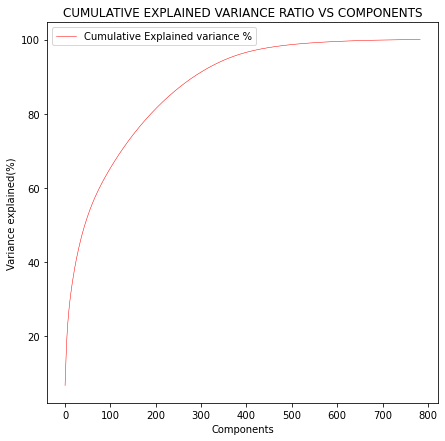

In [26]:
plt.figure(figsize = (7,7))
plt.plot(cumulative_explained_variance_ratio, "r-",linewidth=0.5)
plt.title("CUMULATIVE EXPLAINED VARIANCE RATIO VS COMPONENTS")
plt.xlabel("Components")
plt.ylabel("Variance explained(%)")
plt.legend(["Cumulative Explained variance %"], loc='best')

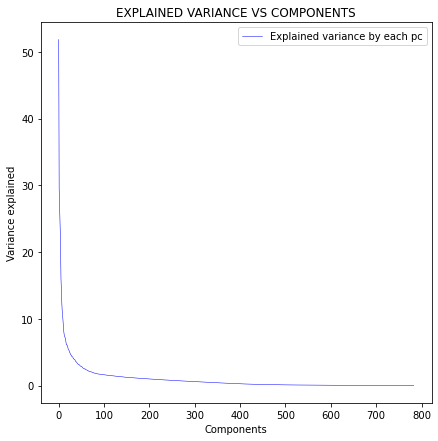

In [27]:
# Scree plot for Eigen values
plt.figure(figsize = (7,7))
plt.plot(values, "b-",linewidth=0.5)
plt.title("EXPLAINED VARIANCE VS COMPONENTS")
plt.xlabel("Components")
plt.ylabel("Variance explained")
plt.legend(['Explained variance by each pc'], loc='best')

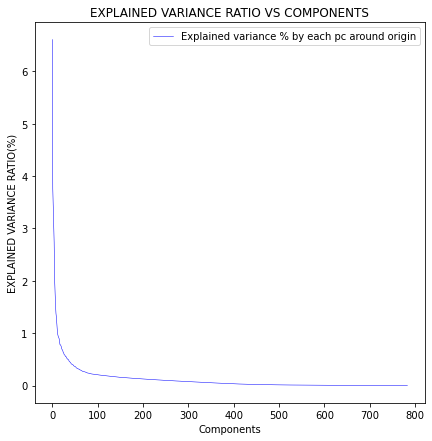

In [28]:
# Scree plot for Explained variance ratio
plt.figure(figsize = (7,7))
plt.plot(explained_variance_ratio, "b-",linewidth=0.5)
plt.title("EXPLAINED VARIANCE RATIO VS COMPONENTS")
plt.xlabel("Components")
plt.ylabel("EXPLAINED VARIANCE RATIO(%)")
plt.legend(['Explained variance % by each pc around origin'], loc='best')

Discussing Good cut-off
- Scree Plots: Criteria-1
    -  Eigen value scree plot-->
        - On visualizing the scree plot and using the elbow method to determine the number of principal components, we see that there is a big drop when PC=50(approximately). If we choose these number of components then the variance explained by our model is roughly around 40% which will be a drastic model. If we choose the point where the line becomes constant, then the number of components would be approximately 200 which suggests a good variance of around 80%.

    - Explained variance % scree plot-->
        - Same is the case with this plot as we are just finding the variance % explained by each P.C eigen.val/sum(eigen.val).

*RESULT*: we choose Number of components=200 (approximately)

- Eigen value > 1: Criteria-2

    - If we choose the principal components with eigen values i.e. variance explained by each principal component to be more than 1, then we end up taking exactly 199 components which will let our model explain the variance of around 80%.

*RESULT*: we choose Number of components=199 or 200.

- Cumulative explained variance: Criteria-3
    - If we want to have our model explain 80% of the total variance, then we simply analyze the Cumulative plot and find out that around 200 components will explain this much variance. Also, if we look the values of our variable "cum_exp_variance", it suggests 80% variance explained at No_components=200.

*RESULT*: we choose Number of components=200.

1. https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22

2. https://ro-che.info/articles/2017-12-11-pca-explained-variance

3. https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained

## Subplots

In [29]:
pca = PCA(20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca = pd.concat([X_train_pca,pd.DataFrame(y_train,columns=['gnd'])], axis =1)
X_test_pca = pd.concat([X_test_pca, pd.DataFrame(y_test,columns=['gnd'])], axis =1)
X_train_pca

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,gnd
0,0.191337,-4.963643,9.883400,0.461710,0.014493,-1.970931,1.532714,0.377435,-1.426657,-3.949743,...,-0.515430,-3.251572,-0.789993,-2.221080,-1.620243,0.607756,-1.228789,1.788283,3.925473,4
1,-3.920867,10.294878,2.907096,2.971730,-3.557965,4.760346,3.923588,-4.734912,0.961426,-6.478170,...,4.830086,-2.225432,-0.337778,-4.105375,-2.755320,0.449679,10.083983,-1.529472,-4.608261,3
2,5.907712,3.949723,11.452273,2.005728,-3.446730,-1.241137,-3.773252,-4.900509,-2.281333,-1.175580,...,1.262881,-3.837151,-1.686295,0.316637,5.578055,0.470712,-1.496459,-3.009494,0.446923,4
3,-3.465131,0.962952,-1.728119,4.517559,2.724143,-3.829675,-3.654126,-0.776123,0.226224,1.064889,...,-1.016294,-1.618445,3.422245,-1.135404,0.838857,-1.792500,2.355296,1.046947,-1.115834,2
4,-9.335113,-1.994170,0.109588,-5.571261,2.126349,0.436169,2.529664,0.651460,0.879170,1.689759,...,1.704619,-1.067309,-0.953008,0.421947,0.480456,1.716707,-0.485549,-1.236274,-0.041064,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,-9.419799,-1.845220,-1.523299,-3.229949,2.053045,1.817943,-0.917287,3.377098,2.135405,-0.235464,...,-1.614910,-3.235723,-0.196945,0.429680,-0.175422,1.509787,0.705707,-1.833547,0.149047,1
1648,-1.275755,-0.264238,-6.014348,-0.617119,-4.075028,0.531514,-3.266427,0.863249,0.079458,2.892057,...,-2.158460,0.513440,2.887277,-0.133698,1.726690,0.271048,0.417530,0.613187,-0.765248,3
1649,-0.001954,2.476660,-7.564504,1.780496,-7.419620,6.292317,-4.923192,-3.331345,-1.341089,-1.009304,...,0.857083,-0.252359,-0.081739,-1.977641,1.172831,1.207826,0.433610,2.627453,-1.582864,3
1650,-4.957713,2.438802,-7.106941,4.436481,2.113500,-3.170140,-0.295848,3.329811,-2.251180,2.450860,...,-2.518111,-3.229755,0.649059,-0.591585,2.996320,-1.844938,2.192409,-0.646932,2.770426,2


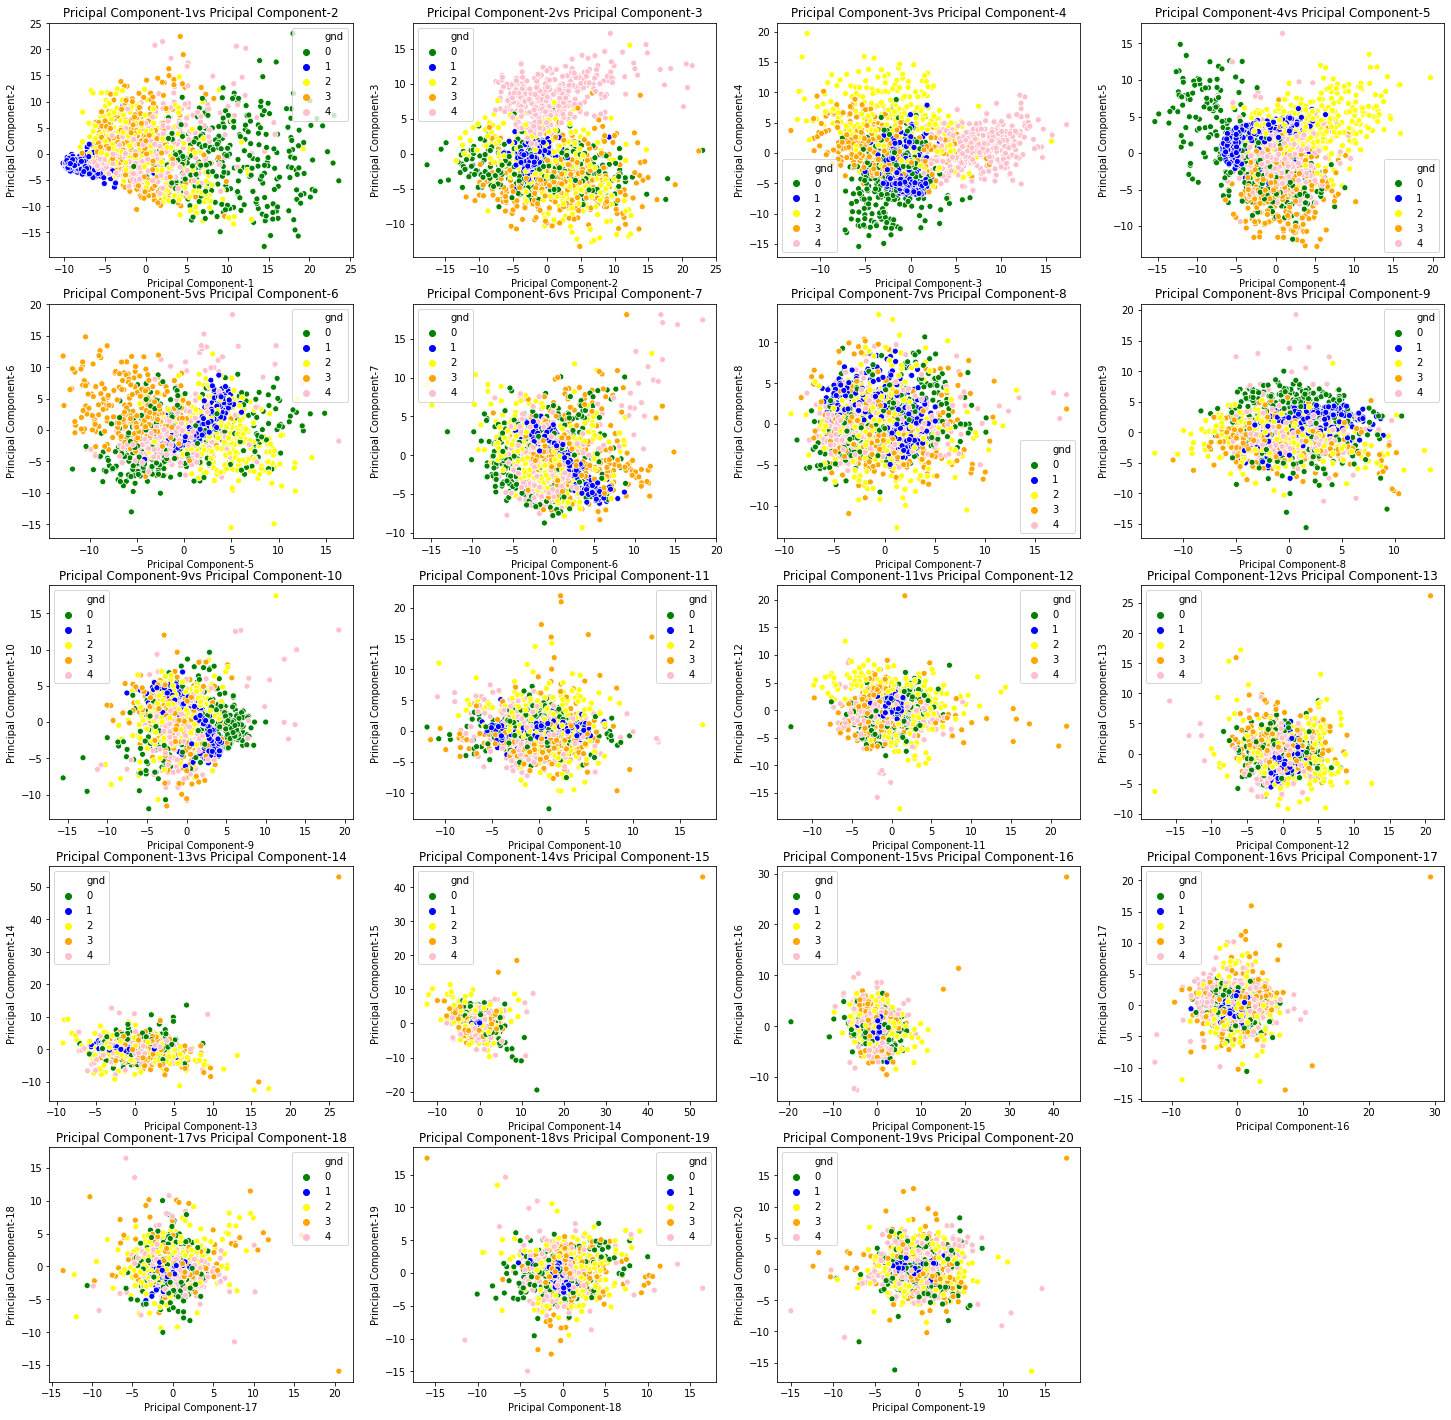

In [30]:
fig, axs = plt.subplots(5,4,figsize=(25,25))
k=0
fig.delaxes(axs[4][3])
for i in range(0,axs.shape[0]):
    for j in range(0,axs.shape[1]):
        sns.scatterplot(X_train_pca[k], X_train_pca[k+1],hue=X_train_pca.gnd,legend='full',ax=axs[i,j],palette=['green','blue','yellow','orange','pink'])
        axs[i,j].set(xlabel='Pricipal Component-'+str(k+1),ylabel='Principal Component-'+str(k+2))
        
        axs[i,j].set_title('Pricipal Component-'+str(k+1)+'vs Pricipal Component-'+str(k+2))
        
        if i==4 and j==2:
            break;
        k=k+1;

In [31]:
corr = X_train_pca.corr()
corr['gnd']

0     -0.192760
1      0.210387
2      0.488116
3      0.377709
4     -0.262804
5      0.098581
6     -0.015237
7     -0.117128
8     -0.275561
9     -0.039524
10    -0.134616
11    -0.099228
12     0.023558
13    -0.032244
14    -0.065283
15     0.016707
16     0.045004
17     0.065446
18     0.046826
19     0.109289
gnd    1.000000
Name: gnd, dtype: float64

### - PCA using Numpy's SVD and manual

- using SVD

In [32]:
# using SVD
u, sigma, v = np.linalg.svd(X_train, full_matrices = True)

uh = pd.DataFrame(u)
vh = pd.DataFrame(v)
sigma = pd.DataFrame(sigma)

In [33]:
uh

,0,1,2,3,4,5,6,7,8,9,...,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651
0,0.000654,0.022497,0.047038,0.002306,0.000077,-0.012111,0.010075,-0.002665,-0.010659,0.030433,...,-0.035664,-0.029805,0.003967,0.034544,0.005848,-0.003071,0.025074,-0.001227,-0.033869,0.021523
1,-0.013405,-0.046660,0.013836,0.014844,-0.018902,0.029250,0.025790,0.033439,0.007187,0.049963,...,0.006793,0.027865,0.019179,0.066050,0.001465,-0.004236,-0.007815,0.026270,-0.027532,-0.002507
2,0.020197,-0.017901,0.054504,0.010019,-0.018311,-0.007626,-0.024805,0.034598,-0.017096,0.009056,...,0.026374,0.032200,-0.051963,-0.007860,0.009334,0.028534,0.008874,-0.007442,-0.010453,-0.008383
3,-0.011846,-0.004364,-0.008225,0.022566,0.014472,-0.023533,-0.024014,0.005478,0.001707,-0.008182,...,0.036128,0.038700,-0.060510,0.056535,-0.002677,0.015256,0.020832,-0.017796,-0.014260,-0.006889
4,-0.031915,0.009038,0.000522,-0.027829,0.011296,0.002680,0.016624,-0.004603,0.006568,-0.013049,...,-0.023766,-0.066276,-0.006819,-0.016310,0.025491,-0.049311,0.039887,0.013084,-0.003978,-0.007111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,-0.032204,0.008363,-0.007250,-0.016134,0.010907,0.011170,-0.006028,-0.023847,0.015986,0.001812,...,0.003093,0.010419,0.008070,-0.001645,-0.004385,0.740827,-0.012118,-0.008721,0.011879,0.037172
1648,-0.004362,0.001198,-0.028624,-0.003083,-0.021649,0.003266,-0.021473,-0.006097,0.000582,-0.022310,...,-0.010339,-0.019894,0.013249,0.015861,-0.009934,-0.007633,0.604109,-0.011392,0.029834,0.030306
1649,-0.000007,-0.011225,-0.036001,0.008894,-0.039417,0.038665,-0.032352,0.023531,-0.009980,0.007797,...,0.009894,0.017315,0.012027,0.028778,-0.019605,-0.013610,0.025115,0.585019,-0.015015,-0.013485
1650,-0.016949,-0.011053,-0.033824,0.022161,0.011228,-0.019481,-0.001943,-0.023515,-0.016838,-0.018889,...,0.009964,-0.022106,0.016685,0.003291,0.019743,-0.002615,-0.004401,-0.023594,0.528628,-0.017144


In [34]:
vh

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.003553,-0.000108,-0.000274,-0.002872,0.000210,0.005472,-0.002864,-0.002740,-0.004320,-0.002407,...,-0.003120,0.001055,0.003005,0.000757,0.004400,0.001814,-0.004042,0.000803,-0.001752,0.004070
1,0.006134,-0.007581,-0.000381,0.004801,-0.005348,-0.004760,-0.010934,0.002900,-0.004899,-0.004419,...,-0.004177,-0.000993,0.004918,0.002450,-0.007581,-0.004377,-0.007020,0.004313,0.003936,0.001885
2,-0.002908,0.000241,-0.007449,-0.000294,-0.002431,-0.001348,-0.005895,0.006565,-0.002504,-0.001612,...,0.001589,0.008749,0.001286,0.007502,0.000945,0.001516,0.009918,-0.002986,0.001823,0.008013
3,0.006103,0.001520,-0.005349,-0.005158,0.013624,0.003878,-0.003070,-0.000882,-0.002626,0.004909,...,0.012429,-0.009366,0.004827,-0.007007,-0.000639,-0.007469,0.000738,0.003889,-0.000655,0.003973
4,-0.001751,0.000338,-0.000862,-0.001627,0.000463,0.011321,0.001107,0.012624,-0.001951,-0.003387,...,0.000220,-0.000827,0.006530,-0.000486,0.002824,0.004999,0.002623,0.002022,-0.001416,-0.001093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.003030,0.007792,-0.002591,0.005856,0.009065,0.007496,0.003995,-0.000069,0.003169,0.000872,...,-0.002404,0.002833,0.003074,-0.006005,-0.004843,-0.002869,0.006152,-0.000659,-0.002515,-0.002912
780,-0.001104,0.000392,-0.000565,-0.015212,0.009607,0.004631,0.001206,-0.011832,0.003156,-0.001152,...,0.007312,0.007868,0.008057,-0.000457,0.005697,0.004065,0.003786,-0.003031,-0.003809,0.007953
781,0.001732,-0.004714,0.006927,-0.002670,-0.010301,-0.004671,-0.004382,0.001395,-0.001915,0.002289,...,0.003109,0.004009,0.000055,0.000837,0.001744,-0.002958,-0.002990,-0.000194,0.001493,0.000851
782,-0.002707,0.004205,0.006568,0.007783,0.004371,0.000167,0.000660,-0.001843,0.005171,-0.004000,...,0.008353,-0.012302,0.001290,-0.003071,-0.008851,0.000634,0.001070,-0.002658,-0.008009,-0.001777


In [35]:
sigma

,0
0,292.503638
1,220.636738
2,210.116710
3,200.196896
4,188.230490
...,...
779,3.198679
780,3.144339
781,3.054179
782,3.014550


- Manually

In [36]:
covariance_matrix = np.matmul(X_train.T,X_train)
values, vectors = np.linalg.eig(covariance_matrix)

In [37]:
index_order = np.argsort(values)[::-1]
values = values[index_order]
vectors = vectors[:,index_order]

In [38]:
s = pd.DataFrame(np.sqrt(values))
s

,0
0,292.503638
1,220.636738
2,210.116710
3,200.196896
4,188.230490
...,...
779,3.198679
780,3.144339
781,3.054179
782,3.014550


In [39]:
v = pd.DataFrame(vectors)
v

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.003553,0.006134,-0.002908,0.006103,-0.001751,-0.001144,0.000377,-0.005908,-0.001687,-0.005597,...,0.003041,0.000304,0.007155,-0.001774,0.005725,0.003030,-0.001104,-0.001732,0.002707,0.001139
1,-0.000108,-0.007581,0.000241,0.001520,0.000338,-0.003706,0.002420,-0.010348,-0.007104,-0.002729,...,0.004082,-0.006591,-0.006105,-0.000989,0.011787,0.007792,0.000392,0.004714,-0.004205,-0.003713
2,-0.000274,-0.000381,-0.007449,-0.005349,-0.000862,0.001078,-0.001888,-0.014769,-0.008684,0.011443,...,0.003144,0.001979,0.000407,-0.003259,0.002120,-0.002591,-0.000565,-0.006927,-0.006568,-0.005011
3,-0.002872,0.004801,-0.000294,-0.005158,-0.001627,-0.000198,0.002306,0.001630,0.014691,0.014353,...,-0.000791,0.000600,-0.001397,-0.002481,-0.005064,0.005856,-0.015212,0.002670,-0.007783,0.004112
4,0.000210,-0.005348,-0.002431,0.013624,0.000463,-0.002366,0.008549,-0.013779,-0.003846,0.004572,...,-0.002377,-0.007654,0.006874,-0.006293,-0.005944,0.009065,0.009607,0.010301,-0.004371,-0.002665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.001814,-0.004377,0.001516,-0.007469,0.004999,-0.003591,0.006391,-0.000102,0.003041,-0.004770,...,0.000476,0.005351,-0.008445,0.003141,0.009888,-0.002869,0.004065,0.002958,-0.000634,-0.000692
780,-0.004042,-0.007020,0.009918,0.000738,0.002623,0.011129,-0.015725,-0.002592,-0.002613,-0.011274,...,-0.002707,0.004124,0.005243,0.004372,-0.004252,0.006152,0.003786,0.002990,-0.001070,-0.005390
781,0.000803,0.004313,-0.002986,0.003889,0.002022,0.013894,-0.000212,-0.010658,-0.002485,0.006936,...,0.004683,-0.002624,0.005693,0.004488,-0.009020,-0.000659,-0.003031,0.000194,0.002658,-0.003134
782,-0.001752,0.003936,0.001823,-0.000655,-0.001416,-0.012224,-0.006052,0.002224,-0.014296,-0.003144,...,-0.005015,0.008783,0.002330,0.001723,0.005125,-0.002515,-0.003809,-0.001493,0.008009,-0.003687


### Finding principal components

In [40]:
proj_pca=np.dot(v.T,X_train.T)
proj_pca=pd.DataFrame(proj_pca)
proj_pca.T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.191337,4.963646,9.883397,0.461713,0.014457,1.970884,-1.532805,0.377404,-1.424666,-3.947069,...,0.092766,0.100105,0.022676,-0.027730,-0.043051,-0.063123,-0.083530,-0.050655,0.019053,0.103305
1,-3.920867,-10.294878,2.907100,2.971723,-3.557959,-4.760057,-3.923669,-4.735573,0.960576,-6.480063,...,0.007528,-0.108605,-0.063406,-0.006282,0.028725,-0.046206,0.008835,-0.093150,0.001872,-0.027588
2,5.907712,-3.949726,11.452269,2.005732,-3.446746,1.241099,3.773893,-4.899696,-2.285028,-1.174505,...,-0.104183,0.039939,-0.021841,0.063073,0.054783,-0.010984,0.039723,-0.004398,0.087966,0.044429
3,-3.465131,-0.962949,-1.728113,4.517548,2.724156,3.829693,3.653568,-0.775799,0.228156,1.061192,...,-0.024125,0.028920,0.110427,-0.023409,-0.121662,-0.062801,-0.024292,0.055772,-0.094390,-0.017844
4,-9.335113,1.994168,0.109582,-5.571259,2.126318,-0.436190,-2.529229,0.651913,0.877872,1.692411,...,-0.154840,-0.056232,-0.036927,-0.038715,0.006130,-0.030692,-0.127279,0.001583,0.009668,0.014953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,-9.419799,1.845222,-1.523299,-3.229949,2.053039,-1.817825,0.917152,3.377233,2.136587,-0.234997,...,0.057355,-0.011086,0.104833,-0.031064,-0.009983,0.084505,-0.012117,-0.044610,0.081425,-0.036754
1648,-1.275755,0.264235,-6.014357,-0.617109,-4.075075,-0.531547,3.266860,0.863494,0.077818,2.893583,...,0.002862,0.003709,-0.046468,0.055185,-0.080862,0.049895,-0.011181,0.013677,-0.056257,-0.052811
1649,-0.001954,-2.476656,-7.564496,1.780496,-7.419557,-6.292229,4.922100,-3.332481,-1.333899,-1.011297,...,0.128916,0.055719,-0.001328,-0.062123,-0.052507,0.031406,-0.049138,-0.069262,0.148974,-0.062101
1650,-4.957713,-2.438799,-7.106934,4.436473,2.113528,3.170277,0.295644,3.330091,-2.250539,2.449840,...,-0.015250,0.087853,-0.078272,-0.034923,-0.025463,0.113724,0.017582,-0.001804,0.091392,0.019683


### Reconstruction of X_train

In [41]:
X_train_reconstructed = np.dot(v,proj_pca)
pd.DataFrame(X_train_reconstructed.T)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-1.022392,-0.377715,1.693353,-0.991164,-0.973618,-0.324643,0.338111,-0.988998,1.002598,-0.323111,...,0.981789,-0.298126,-0.334032,1.019840,-0.298016,1.668671,-0.335349,0.961352,-1.578534,-1.676140
1,-1.701794,0.285394,-0.962005,-0.991164,-0.973618,0.342409,0.338111,-0.988998,-1.009907,-0.323111,...,-1.649055,0.376537,0.981393,1.019840,-0.957083,1.005697,-0.335349,-1.695534,-1.578534,0.977414
2,1.015812,0.948502,-0.962005,-0.991164,0.351818,1.676513,0.996015,0.314932,0.331763,1.006351,...,0.324078,-0.972788,-0.991744,0.351808,-0.298016,-1.646197,-1.659114,-0.367091,-1.578534,-1.676140
3,-1.701794,0.948502,1.029514,-0.991164,-0.310900,-0.991695,0.996015,0.966897,1.002598,0.341620,...,-1.649055,-0.972788,-0.991744,1.687871,0.361050,-0.320250,-1.659114,0.961352,-0.269100,0.314025
4,-1.701794,0.285394,-0.962005,1.005668,0.351818,-0.324643,0.996015,-0.337033,1.002598,-0.987842,...,-1.649055,-0.298126,-0.991744,1.687871,-0.298016,-0.320250,-0.335349,-0.367091,1.040334,-1.676140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,-1.022392,0.948502,1.029514,1.671279,1.014536,-0.991695,0.338111,-0.988998,1.002598,-0.323111,...,0.324078,-0.298126,-0.991744,0.351808,-0.957083,-0.320250,0.988417,-1.031312,-0.269100,0.977414
1648,-1.022392,0.285394,-0.962005,1.005668,1.014536,0.342409,0.996015,-0.988998,0.331763,1.006351,...,-1.649055,0.376537,-0.334032,-1.652286,1.020117,-0.983224,-0.335349,-1.031312,0.385617,1.640802
1649,0.336411,-1.703933,0.365674,-0.991164,0.351818,-1.658747,0.338111,-0.337033,1.673433,-0.323111,...,-0.333633,-0.972788,-0.991744,-1.652286,-0.298016,-0.983224,-0.997231,0.297131,1.040334,-1.012751
1650,-1.701794,0.285394,1.029514,1.005668,-0.310900,0.342409,-0.319792,-0.988998,1.002598,1.006351,...,0.324078,-0.972788,0.323680,0.351808,-0.298016,0.342724,-0.335349,-1.031312,-1.578534,0.977414


In [42]:
X_train

array([[-1.02239238, -0.37771508,  1.69335298, ...,  0.96135187,
        -1.57853409, -1.67613978],
       [-1.70179391,  0.28539364, -0.96200452, ..., -1.6955336 ,
        -1.57853409,  0.97741357],
       [ 1.01581222,  0.94850236, -0.96200452, ..., -0.36709087,
        -1.57853409, -1.67613978],
       ...,
       [ 0.33641069, -1.70393252,  0.36567423, ...,  0.2971305 ,
         1.04033442, -1.01275144],
       [-1.70179391,  0.28539364,  1.02951361, ..., -1.03131223,
        -1.57853409,  0.97741357],
       [ 0.33641069,  1.61161108, -0.96200452, ...,  0.2971305 ,
         0.38561729, -0.34936311]])

RESULT ::=>
1. Reconstruction is done.
2. The original dataset is equal to x_train_reconstructed.
3. Singular value s and singular vector v is also found which can be compared with implementation of svd.

### - Dual PCA
- Just change the np.matmul(X_train,X_train.T) to give the result in terms of dimensions n * n(n-> Number of observations). 
- Dual PCA is basically used when the number of dimensions >> no of observations to reduce the time of computations and save the computation storage as well. In our case case, Number of dimensions are less than the number of observations. So the time complexity will increase rather than decreasing.

### - FDA / LDA

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

In [44]:
# checking separability
lda_with_label=pd.concat([pd.DataFrame(X_train_lda),pd.DataFrame(y_train,columns=['gnd'])],axis=1)
lda_with_label

,0,1,2,3,gnd
0,-0.749167,5.099912,-1.197454,-1.428683,4
1,-1.559558,-0.861650,-2.990774,-1.447828,3
2,0.344562,7.448683,-0.986947,-0.602353,4
3,0.397739,0.886638,-0.875231,5.166400,2
4,5.912171,-1.871202,3.885492,-1.268583,1
...,...,...,...,...,...
1647,5.680274,-0.799050,2.457552,0.604178,1
1648,-1.638496,-4.042661,-4.845836,-2.270414,3
1649,-0.313274,-3.392322,-6.502118,-2.213588,3
1650,2.131676,-1.693355,-2.212953,3.619343,2


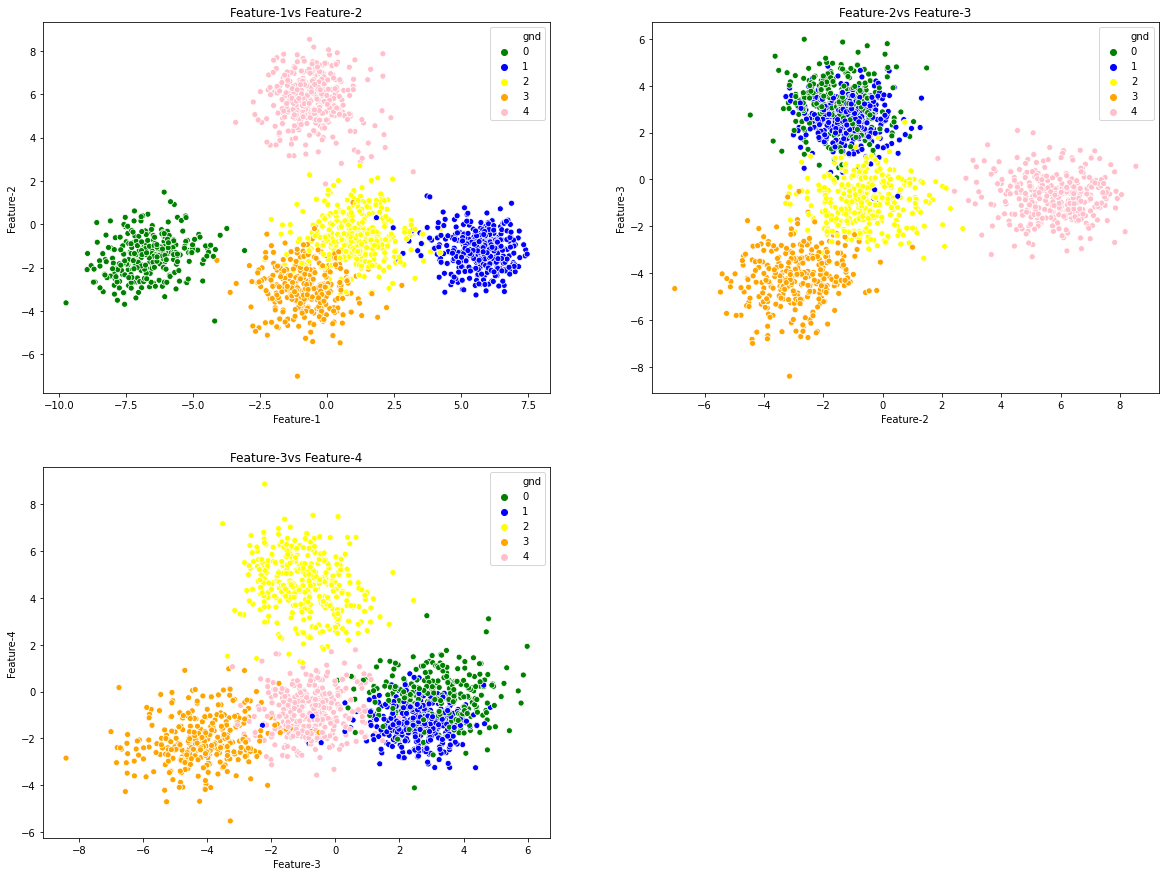

In [45]:
fig, axs = plt.subplots(2,2,figsize=(20,15))
k=0
fig.delaxes(axs[1][1])
for i in range(0,axs.shape[0]):
    for j in range(0,axs.shape[1]):
        sns.scatterplot(lda_with_label[k], lda_with_label[k+1],hue=lda_with_label.gnd,legend='full',ax=axs[i,j],palette=['green','blue','yellow','orange','pink'])
        axs[i,j].set(xlabel='Feature-'+str(k+1),ylabel='Feature-'+str(k+2))
        
        axs[i,j].set_title('Feature-'+str(k+1)+'vs Feature-'+str(k+2))
        
        if i==1 and j==0:
            break;
        k=k+1;

#### ANALYSIS::->
##### RESULTS [known classes] & SEPARABILITY=>
###### LDA1 VS LDA2
LDA1 :=>LDA 1 separates class label [0,1] from each other and from [2,3,4] very well.( i.e if we tend to draw a line on the LDA1 axes(x axes)) whereas Class labels [2,3,4] overlap with each other.

LDA2 :=>LDA 2 separates class label [4] from [0,1,2,3]very well if we draw a line on the LDA2 axes(y axes)). Class labels [0,1,2,3] overlap with each other.

###### LDA2 VS LDA3
LDA2 :=>LDA 2 separates class label [4] from [0,1,2,3]very well if we draw a line on the LDA2 axes(x axes)). Class labels [0,1,2,3] overlap with each other.

LDA3 :=>LDA 3 separates class label [3] from [0,1,2,4]very well if we draw a line on the LDA3 axes(y axes)). Class labels [0,1]and [2,4] overlap.

###### LDA3 VS LDA4
LDA3 :=>LDA 3 separates class label [3] from [0,1,2,4]very well if we draw a line on the LDA3 axes(x axes)). Class labels [0,1]and [2,4] overlap.

LDA4 :=>LDA 4 separates class label [2] from [0,1,3,4]very well if we draw a line on the LDA3 axes(y axes)). Class labels [0,1,3,4] overlap.

###### RESULT::=> It can be concluded that first direction of LDA separates classes better than the rest of the directions which can be theortically proved by finding the ranked eigen values.

#### COMPARISON BETWEEN LDA AND PCA RESULTS:==>
1. PCA lets us find the principal components with the highest variation in the data.

2. LDA finds the directions taking the variation between the classes and the variation within the class into consideration. i.e Maximize(Var_between) and Minimize(var_within)

3. From looking at the plots of both PCA and LDA, we can easily conclude that the "class separability" provided by the lDA directions is far better than that provided by the PCA, whereas the overall variation of data is best in PCA.

4. Correlation between the class and the direction is also more in case of LDA whereas PC1 and PC2 accounted for only 0.19 and 0.15 of correltion with the class labels.


1.https://sebastianraschka.com/Articles/2014_python_lda.html

2.https://towardsdatascience.com/linear-discriminant-analysis-lda-101-using-r-6a97217a55a6



In [46]:
# General Model for testing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

knn = KNN(n_neighbors=20, weights= 'distance', p = 1)
knn.fit(X_train_lda,y_train)
y_pred = knn.predict(X_test_lda)

acc = accuracy_score(y_pred,y_test)*100
print("Accuracy using KNN on LDA projected vectors is {}".format(acc))

pca = PCA(200)
X_train_pca = pca.fit_transform(X_train,y_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNN(n_neighbors=20, weights = 'distance', p=1)
knn_pca.fit(X_train_pca,y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_pred_pca,y_test)*100
print("Accuracy using KNN on PCA projected vectors is {}".format(acc_pca))

Accuracy using KNN on LDA projected vectors is 89.61352657004831
Accuracy using KNN on PCA projected vectors is 82.6086956521739


# Non linear dimensionality reduction
1. Kernel PCA
2. ISOMAP
3. LLE
4. SPECTRAL EMBEDDING/ LAPLACIAN EIGENMAP
5. T-SNE

In [47]:
data

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,2062,4,0,3,0,4,0,4,3,1,...,0,1,4,5,4,2,2,2,2,4
2062,2063,2,2,3,4,2,1,2,3,3,...,4,0,1,3,4,0,2,3,2,4
2063,2064,2,3,2,3,1,2,5,5,5,...,5,1,1,2,5,2,1,1,3,4
2064,2065,5,2,4,3,1,0,3,2,2,...,3,2,3,1,4,2,4,3,4,4


In [53]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
import timeit 

- KernelPCA

In [56]:
start = timeit.default_timer()

k_pca = KernelPCA(n_components=2, kernel='rbf',random_state=42)
X_train_kpca = k_pca.fit_transform(X_train)
X_test_kpca = k_pca.transform(X_test)

stop = timeit.default_timer()

time_kpca = stop - start

In [66]:
kpca_df = pd.DataFrame(X_train_kpca)
kpca_df = pd.concat([kpca_df, pd.DataFrame(y_train,columns=['gnd'])], axis =1)
kpca_df

,0,1,gnd
0,-0.066389,0.031168,4
1,-0.162690,-0.132582,3
2,-0.135919,0.176259,4
3,0.081007,0.043895,2
4,0.350244,-0.096794,1
...,...,...,...
1647,0.337531,-0.110062,1
1648,0.083334,0.095785,3
1649,-0.017140,0.060893,3
1650,0.078649,-0.064435,2


Text(0.5, 1.0, 'Kernel PCA')

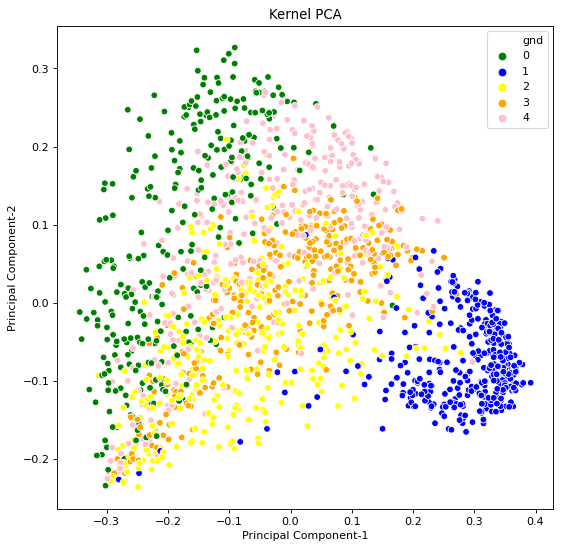

In [67]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=kpca_df[0],y=kpca_df[1],hue=kpca_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.title('Kernel PCA')

- IsoMap

In [69]:
start = timeit.default_timer()

iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_test_iso = iso.transform(X_test)

stop = timeit.default_timer()

time_iso = stop - start

In [70]:
iso_df = pd.DataFrame(X_train_iso)
iso_df = pd.concat([iso_df, pd.DataFrame(y_train,columns=['gnd'])], axis =1)
iso_df

,0,1,gnd
0,-21.471179,51.481785,4
1,-60.265174,11.683633,3
2,16.023488,85.471174,4
3,-19.263064,-23.313022,2
4,-38.334507,-1.459268,1
...,...,...,...
1647,-29.384206,-4.203979,1
1648,-18.347906,-51.963010,3
1649,-16.159008,-57.380021,3
1650,-51.593223,-36.024099,2


Text(0.5, 1.0, 'ISOMAP')

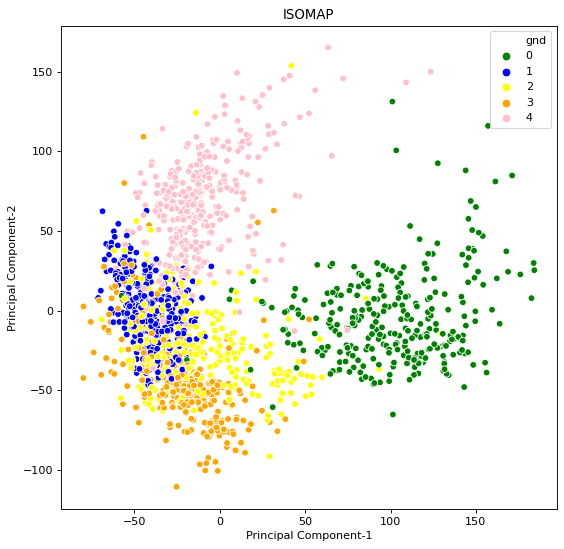

In [71]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=iso_df[0],y=iso_df[1],hue=iso_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.title('ISOMAP')

- LOCALLYLINEAREMBEDDING

In [72]:
start = timeit.default_timer()

lle = LocallyLinearEmbedding(n_components=2)
X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)

stop = timeit.default_timer()

time_lle = stop - start

In [73]:
lle_df = pd.DataFrame(X_train_lle)
lle_df = pd.concat([lle_df, pd.DataFrame(y_train,columns=['gnd'])], axis =1)
lle_df

,0,1,gnd
0,0.013332,0.026806,4
1,0.013822,-0.010548,3
2,0.013803,0.065353,4
3,0.012056,-0.010949,2
4,0.013905,-0.014305,1
...,...,...,...
1647,0.013892,-0.013727,1
1648,0.013860,-0.019075,3
1649,0.013861,-0.019070,3
1650,0.013659,-0.015923,2


Text(0.5, 1.0, 'LLE')

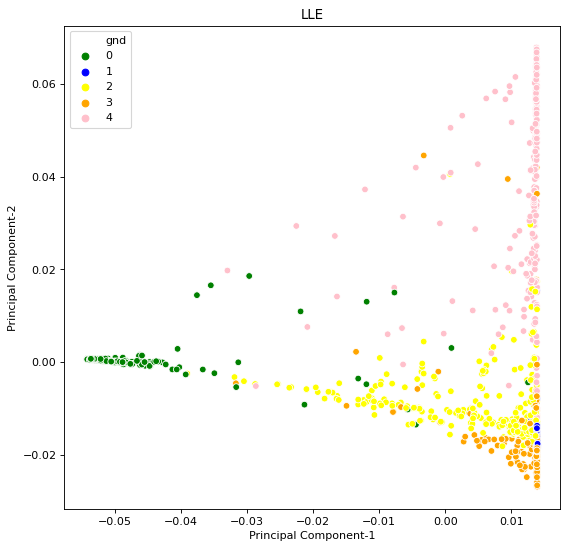

In [74]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=lle_df[0],y=lle_df[1],hue=lle_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.title('LLE')

- SpectralEmbedding

In [76]:
start = timeit.default_timer()

se = SpectralEmbedding(n_components=2)
X_train_se = se.fit_transform(X_train)
# X_test_se = se.transform(X_test)
"""
No transfrom
"""

stop = timeit.default_timer()

time_se = stop - start

In [77]:
se_df = pd.DataFrame(X_train_se)
se_df = pd.concat([se_df, pd.DataFrame(y_train,columns=['gnd'])], axis =1)
se_df

,0,1,gnd
0,-0.000925,0.002651,4
1,-0.001083,0.000496,3
2,0.000097,0.005983,4
3,-0.000682,-0.000828,2
4,-0.001627,-0.000708,1
...,...,...,...
1647,-0.001548,-0.001279,1
1648,0.000742,-0.001490,3
1649,0.000359,-0.001950,3
1650,-0.001039,-0.001987,2


Text(0.5, 1.0, 'SE')

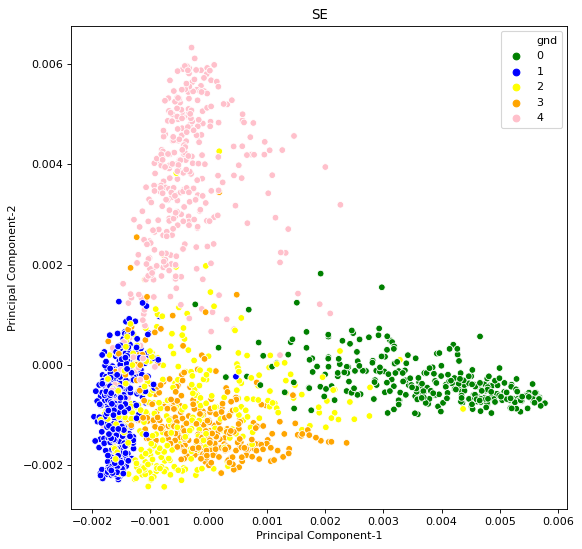

In [79]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=se_df[0],y=se_df[1],hue=se_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.title('SE')

- TSNE

In [82]:
start = timeit.default_timer()

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
# X_test_tsne = tsne.transform(X_test)
"""
No transfrom
"""

stop = timeit.default_timer()

time_tsne = stop - start

In [83]:
tsne_df = pd.DataFrame(X_train_tsne)
tsne_df = pd.concat([tsne_df, pd.DataFrame(y_train,columns=['gnd'])], axis =1)
tsne_df

,0,1,gnd
0,-1.891563,22.131382,4
1,-5.087769,-60.575481,3
2,9.984400,47.233620,4
3,-4.926556,-6.581232,2
4,36.690697,-4.735966,1
...,...,...,...
1647,22.731993,-7.980559,1
1648,-15.641324,-30.252415,3
1649,-10.480764,-47.636829,3
1650,7.273392,-26.199257,2


Text(0.5, 1.0, 'TSNE')

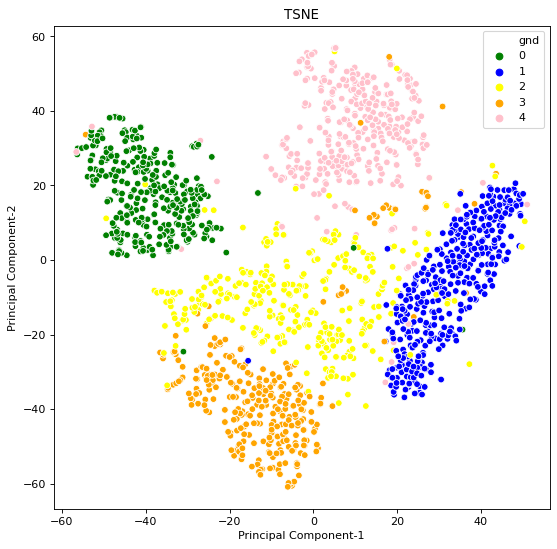

In [84]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=tsne_df[0],y=tsne_df[1],hue=tsne_df.gnd,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Principal Component-1')
plt.ylabel('Principal Component-2')
plt.title('TSNE')

In [85]:
Time = pd.DataFrame(data = {'Model': ["KernelPCA","IsoMap","LLE","SE","T-SNE"],
                            'Time':[time_kpca,time_iso,time_lle,time_se,time_tsne]},columns=["Model","Time"])
Time

,Model,Time
0,KernelPCA,0.204562
1,IsoMap,7.642239
2,LLE,6.615898
3,SE,6.660470
4,T-SNE,15.406332


In [ ]:
# Timetaken = pd.DataFrame(columns = ['Model', 'time'])
# Timetaken = Timetaken.append({'Model':'KPCA', 'time':stop-start},ignore_index=True)

<h1>ANALYSIS=></h1>
<p></p>
<h3>1. Methods and Known class comparison:</h3>

<h4>KERNEL PCA</h4>
<p>1. Class 1 is separated by component 1 along the 'x axes' whereas all the other classes are getting overlapped. </p>
<p>2. Component 2 isn't adding much information to the model along the y axes.</p>

<h4>ISOMAP</h4>
<p>1. Class clusters are made by isomap but there is a lot of overlapping between the classes.</p>
<p>2. class [0,4] are separated by both the components.</p>

<h4>LLE</h4>
<p>1. First component separates class [0,2] along the x axes.</p>
<p>2. Second component separates class [3,4] along y axes.</p>
<p>3. Class label 1 is heavily overlapped.</p>
<p>4. Both the components are adding decent information to the model.</p>

<h4>LAPLACIAN EIGENMAP/SPECTRAL EMBEDDING</h4>
<p>1. Variation within the whole data is minimized.</p>
<p>2. Distance between the clusters is also minimized.</p>
<p>3. Local clusters of class [0,1,3,4] are made whereas class label [2] is widely spread.</p>

<h4>t-SNE</h4>
<p>1. All the classes are separated very well by the components.</p>
<p>2. Well defined clusters are made which are separable along the x and y axes.</p>


<h3>PERFORMANCE DIFFERENCES B/W t-SNE AND KERNEL PCA.</h3>

<h4>1. EXECUTION TIME:=></h4>
<p>a)t-SNE takes more execution time than all the other methods as well as much more than KERNEL PCA. time_taken by t-SNE=38.36 seconds.</p>
<p>b)KERNEL PCA takes less time than the t-SNE. In our case, it is 0.77 seconds which is drastically less than t-SNE.</p>
<p>c)In our case, time hardly matters because the dataset is not that big.</p>

<h4>2.SEPARABILITY:=></h4>
<p>a)KERNEL PCA: The variation among all the data provided by the kernel pca is very high whereas no good clustering/separation between the classes can be seen.</p>
<p>b)T-SNE: The variation within the whole data is less than the kernel pca but the clustering is best.</p>

<h4>OVERLAPPED DATAPOINTS:=></h4>
<p>1.kernel pca is overlapping a lot of datapoints of various classes whereas t-SNE segregates the class labels very well.</p>


<h3>TRADEOFF:=></h3>

<h4>Execution Time:</h4>
<p>There is no need to consider the execution time in our dataset to find out the best method as the time taken by all the methods is in seconds as the dataset is not too large.</p>

<h4>Separability:</h4>
<p>The variation of data within the class and the variation of data between the classes is required to be considered in our method to properly classify the datapoints when any classification technique is applied. It can be clearly seen that t-SNE satisfies both of these tradeoffs providing the best clustering/local clusters for all the datapoints.</p>


<p>1.https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/</p>
<p>2.https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/</p>
<p>3.https://distill.pub/2016/misread-tsne/</p>